In [133]:

import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [134]:
sess = tf.Session()
init_var = tf.global_variables_initializer()
sess.run(init_var)


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [142]:
# Load data
inputs = pd.read_csv('basf_inputs_rand_normalized.csv', sep=",")
targets = pd.read_csv ('basf_targets_rand_normalized.csv', sep=",")


In [205]:
targets.shape

(1028, 1)

In [206]:
targets.drop_duplicates().shape

(464, 1)

In [207]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(targets)
encoded_Y = encoder.transform(targets)
# convert integers to dummy variables (i.e. one hot encoded)
targets = np_utils.to_categorical(encoded_Y)
targets = pd.DataFrame(targets)

In [71]:
data_train_x=inputs.iloc[0:int(len(inputs.index)*train_per)]
data_train_y = targets.iloc[0:int(len(inputs.index)*train_per)]

data_test_x = inputs.iloc[int(len(inputs.index)*train_per):int(len(inputs.index)*.1+(len(inputs.index)*train_per))]
data_test_y = targets.iloc[int(len(targets.index)*train_per):int(len(targets.index)*.1+(len(targets.index)*train_per))]

data_val_x = inputs.iloc[int(len(inputs.index)*.1+(len(inputs.index)*train_per)):len(inputs.index)]
data_val_y = targets.iloc[int(len(targets.index)*.1+(len(targets.index)*train_per)):len(targets.index)]

In [113]:
pd.unique(targets[0])

array([0., 1.])

In [72]:
data_val_y.shape

(103, 464)

In [216]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu'))
    model.add(Dense(464, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [217]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, verbose=0)

In [218]:
history = estimator.fit(data_train_x, data_train_y, validation_data=(data_val_x, data_val_y), validation_steps=10,
                        steps_per_epoch=50, epochs=100)

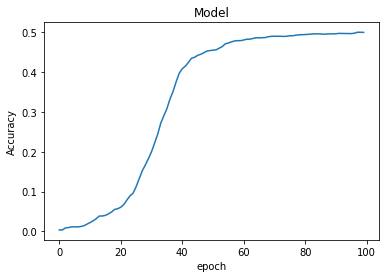

In [214]:
normalized_loss = (history.history['loss']-min(history.history['loss']))/(max(history.history['loss'])-min(history.history['loss']))
plt.plot()
plt.plot(history.history['acc'])
plt.title('Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [203]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [208]:
results = cross_val_score(estimator, inputs, targets, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 0.29% (0.45%)


In [215]:
results

array([0.00970874, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00970874, 0.        , 0.00980392])